**Handwritten Arithmetic Calculator**

Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
from tqdm.notebook import tqdm
import tensorflow as tf
from tensorflow.keras.utils import img_to_array, load_img
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

Extracting data

In [ ]:
!unzip train.zip

Streaming output truncated to the last 5000 lines.
 extracting: train/5499.png          
 extracting: train/55.png            
 extracting: train/550.png           
 extracting: train/5500.png          
 extracting: train/5501.png          
 extracting: train/5502.png          
 extracting: train/5503.png          
 extracting: train/5504.png          
 extracting: train/5505.png          
 extracting: train/5506.png          
 extracting: train/5507.png          
 extracting: train/5508.png          
 extracting: train/5509.png          
 extracting: train/551.png           
 extracting: train/5510.png          
 extracting: train/5511.png          
 extracting: train/5512.png          
 extracting: train/5513.png          
 extracting: train/5514.png          
 extracting: train/5515.png          
 extracting: train/5516.png          
 extracting: train/5517.png          
 extracting: train/5518.png          
 extracting: train/5519.png          
 extracting: train/552.png           

In [ ]:
df = pd.read_csv('train.csv')
df.head()

,filename,label
0,0.png,4
1,1.png,9
2,2.png,1
3,3.png,7
4,4.png,3


In [ ]:
image_path='train/'

Converting Data in Arrays

In [ ]:
X = np.array([img_to_array(load_img(image_path+df['filename'][i],target_size=(28,28,1),grayscale=True))
              for i in tqdm(range(df.shape[0]))
              ]).astype('float32')


  0%|          | 0/49000 [00:00<?, ?it/s]

In [ ]:
Y = df['label']

In [ ]:
# print(X.shape,Y.shape)

(49000, 28, 28, 1) (49000,)


9


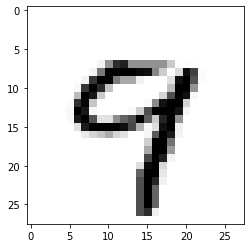

In [ ]:
# image_index=3000
# print(Y[image_index])
# plt.imshow(X[image_index].reshape(28,28),cmap='Greys')

Traning Data

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.1,random_state=42,stratify=np.array(Y))

In [ ]:
x_train /=255
x_test /=255

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [ ]:
input_shape=(28,28,1)
output_class=10

In [ ]:
model= Sequential()
model.add(Conv2D(64, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(128,activation=tf.nn.relu))
model.add(Dropout(0.3))
model.add(Dense(output_class,activation=tf.nn.softmax))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

In [ ]:
model.fit(x=x_train,y=y_train,batch_size=32,epochs=40,validation_data=(x_test,y_test))

Epoch 1/40
1379/1379 [==============================] - 15s 3ms/step - loss: 0.2494 - accuracy: 0.9259 - val_loss: 0.0898 - val_accuracy: 0.9731
Epoch 2/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.1080 - accuracy: 0.9670 - val_loss: 0.0805 - val_accuracy: 0.9763
Epoch 3/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.0812 - accuracy: 0.9749 - val_loss: 0.0623 - val_accuracy: 0.9822
Epoch 4/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.0635 - accuracy: 0.9797 - val_loss: 0.0548 - val_accuracy: 0.9827
Epoch 5/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.0540 - accuracy: 0.9822 - val_loss: 0.0530 - val_accuracy: 0.9847
Epoch 6/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.0418 - accuracy: 0.9862 - val_loss: 0.0553 - val_accuracy: 0.9833
Epoch 7/40
1379/1379 [==============================] - 5s 3ms/step - loss: 0.0385 - accuracy: 0.9868 - val_loss: 0.0563 - val_accuracy

Prediction

0


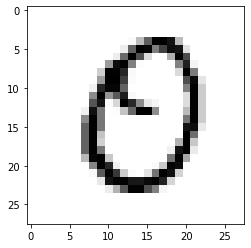

In [ ]:
image_index=3
plt.imshow(x_test[image_index].reshape(28,28),cmap='Greys')
pred=model.predict(x_test[image_index].reshape(1,28,28,1))
print(pred.argmax())

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

In [ ]:
from PIL import Image

In [ ]:
# b1 = (0,40,230,260)
# b2 = (260,40,460,260)
# b3 = (500,40,700,260)
# c8 = (1670,280,1890,500)
# c9 = (1910,280,2130,500)
# c10 = (2140,280,2360,500)

In [ ]:
d={(0,40,230,260),(260,40,460,260),(500,40,700,260),(1670,280,1890,500),(1910,280,2130,500),}

In [ ]:
img =Image.open("a.png")
j=1
for i in d:
  box=i
  i1=img.crop(box)
  #i1
  i1.save(str(j)+'.png')
  j=j+1

In [ ]:
for i in range(1,7):
    image =cv2.imread(str(i)+".png",0)
    inverted_image = cv2.bitwise_not(image)
    cv2.imwrite(str(i)+".png",inverted_image)

In [ ]:
# image =cv2.imread("8.png",0)
# inverted_image = cv2.bitwise_not(image)
# cv2.imwrite("8.png",inverted_image)

True

In [ ]:
n1=''

In [ ]:
n2=''

In [ ]:
# a = np.array([img_to_array(load_img(str(8)+".png",target_size=(28,28,1),grayscale=True))
#               ]).astype('float32')
# plt.imshow(a.reshape(28,28),cmap='Greys')
# pred=model.predict(a.reshape(1,28,28,1))
# print(pred.argmax())

1
8
3


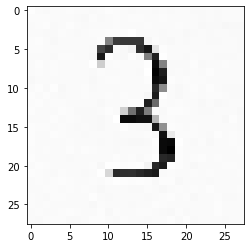

In [ ]:
for i in range(1,4):
    a = np.array([img_to_array(load_img(str(i)+".png",target_size=(28,28,1),grayscale=True))
                  ]).astype('float32')
    plt.imshow(a.reshape(28,28),cmap='Greys')
    pred=model.predict(a.reshape(1,28,28,1))
    print(pred.argmax())
    n1=n1+(str(pred.argmax()))

9
2
0


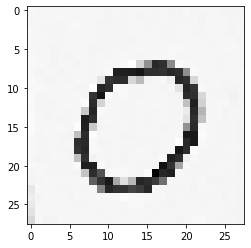

In [ ]:
for i in range(4,7):
    a = np.array([img_to_array(load_img(str(i)+".png",target_size=(28,28,1),grayscale=True))
                  ]).astype('float32')
    plt.imshow(a.reshape(28,28),cmap='Greys')
    pred=model.predict(a.reshape(1,28,28,1))
    print(pred.argmax())
    n2=n2+(str(pred.argmax()))

In [ ]:
n3 = int(n1)+ int (n2)
print(str(n1)+"+"+str(n2)+"="+str(n3))

183+920=1103


In [ ]:
n3 = int(n1)-int (n2)
print(str(n1)+"-"+str(n2)+"="+str(n3))

183-920=-737


In [ ]:
n3 = int(n1)*int (n2)
print(str(n1)+"*"+str(n2)+"="+str(n3))

183*920=168360


In [ ]:
n3 = int(n1)/int (n2)
print(str(n1)+"/"+str(n2)+"="+str(n3))

183/920=0.19891304347826086
